Contingency Table with Totals:
Gender  BrandA  BrandB  Total
Male        30      20     50
Female      40      10     50
Total       70      30    100

Chi-square Statistic: 3.8571428571428577
Degrees of Freedom: 1
P-value: 0.04953461343562649
Expected Frequencies:
[[35. 15.]
 [35. 15.]]

Decision at 5% significance level:
Reject the null hypothesis (H0). There is a significant association between Gender and Brand preference.


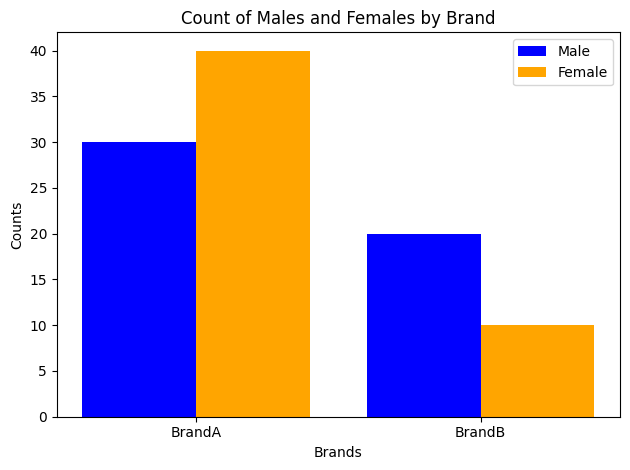

In [2]:
# !pip install statsmodels
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Create the DataFrame
data = {
    "Gender": ["BrandA", "BrandB"],
    "Male": [30, 20],
    "Female": [40, 10]
}

df = pd.DataFrame(data)

# Create a contingency table
contingency_table = df.set_index('Gender').T

# Calculate row and column totals
contingency_table['Total'] = contingency_table.sum(axis=1)  # Horizontal total
contingency_table.loc['Total'] = contingency_table.sum(axis=0)  # Vertical total

print("Contingency Table with Totals:")
print(contingency_table)

# Perform the chi-square test (excluding the total row and column)
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table.iloc[:-1, :-1])

# Print the results
print("\nChi-square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("P-value:", p_value)
print("Expected Frequencies:")
print(expected)

# Set significance level
alpha = 0.05

# Decision based on the p-value
if p_value <= alpha:
    decision = "Reject the null hypothesis (H0). There is a significant association between Gender and Brand preference."
else:
    decision = "Fail to reject the null hypothesis (H0). There is no significant association between Gender and Brand preference."

print("\nDecision at 5% significance level:")
print(decision)

# Plotting the results
labels = df['Gender']
male_counts = df['Male']
female_counts = df['Female']

x = range(len(labels))  # The x locations for the groups

# Create a bar chart
plt.bar(x, male_counts, width=0.4, label='Male', color='blue', align='center')
plt.bar([p + 0.4 for p in x], female_counts, width=0.4, label='Female', color='orange', align='center')

# Adding titles and labels
plt.title('Count of Males and Females by Brand')
plt.xlabel('Brands')
plt.ylabel('Counts')
plt.xticks([p + 0.2 for p in x], labels)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
